In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("/content/drive/MyDrive/Data/", "another*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
       Axial  Tangential  Radial  fault
0      -0.04        0.47    8.94      1
1      -1.37        1.92    9.06      1
2      -3.22        0.35   10.83      1
3      -1.06       -0.98   10.24      1
4       0.12        0.20    8.67      1
...      ...         ...     ...    ...
16945  -2.31        0.16   10.32      0
16946  -0.86        4.28    9.57      0
16947   1.18        3.18    8.47      0
16948   0.51       -0.51    6.32      0
16949  -1.80       -3.69   12.16      0

[16950 rows x 4 columns]


In [6]:
df.shape

(16950, 4)

In [7]:
df.fault.value_counts()

1    8551
0    8399
Name: fault, dtype: int64

In [8]:
from imblearn.over_sampling import BorderlineSMOTE
x = df.drop('fault', axis=1)
y = df['fault']
oversample = BorderlineSMOTE()   
x, y = oversample.fit_resample(x, y)


In [9]:
print(x)
print(y)

          Axial  Tangential     Radial
0     -0.040000    0.470000   8.940000
1     -1.370000    1.920000   9.060000
2     -3.220000    0.350000  10.830000
3     -1.060000   -0.980000  10.240000
4      0.120000    0.200000   8.670000
...         ...         ...        ...
17097 -3.818141    0.318546  12.690270
17098 -0.860000    4.372630   9.602219
17099 -1.172432   -0.931351  11.453243
17100 -2.680677    0.284303  12.583307
17101 -1.448358    3.953831  11.551492

[17102 rows x 3 columns]
0        1
1        1
2        1
3        1
4        1
        ..
17097    0
17098    0
17099    0
17100    0
17101    0
Name: fault, Length: 17102, dtype: int64


In [10]:
df.head()

,Axial,Tangential,Radial,fault
0,-0.04,0.47,8.94,1
1,-1.37,1.92,9.06,1
2,-3.22,0.35,10.83,1
3,-1.06,-0.98,10.24,1
4,0.12,0.20,8.67,1


<Axes: xlabel='Radial', ylabel='Axial'>

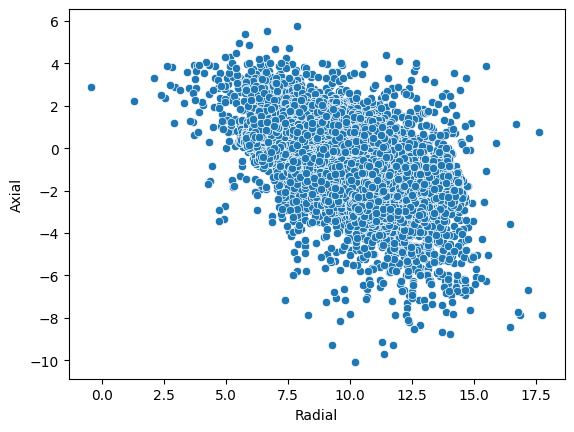

In [11]:
sns.scatterplot(x=df['Radial'], y=df['Axial'])

<Axes: xlabel='Tangential'>

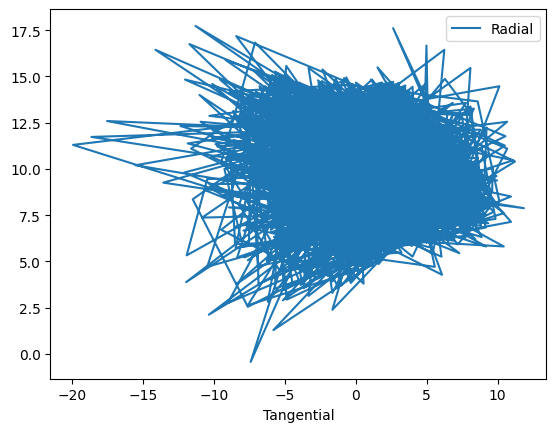

In [12]:
df.plot('Tangential','Radial')

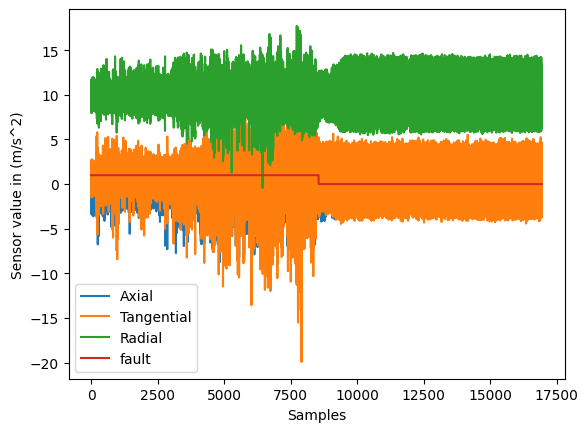

In [13]:
df.plot()
plt.xlabel("Samples")
plt.ylabel("Sensor value in (m/s^2)")

plt.show()

In [14]:
SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns)
df_scaled

,Axial,Tangential,Radial
0,0.361979,-0.089595,-0.447703
1,-0.455010,0.422956,-0.388125
2,-1.591423,-0.132013,0.490653
3,-0.264584,-0.602146,0.197727
4,0.460263,-0.185035,-0.581754
...,...,...,...
17097,-1.958847,-0.143131,1.414249
17098,-0.141729,1.289920,-0.118921
17099,-0.333649,-0.584949,0.800084
17100,-1.260129,-0.155236,1.361144


In [15]:
X_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.2)

In [16]:
X_train

,Axial,Tangential,Radial
1314,-0.387439,-0.559728,0.138149
5922,-0.092586,1.020343,-0.954118
13172,-0.553294,-0.450148,0.877912
7916,-1.830991,0.910763,-0.934258
16498,0.699831,-0.075455,-1.827931
...,...,...,...
7299,1.160539,1.713170,-0.348406
14838,-0.792862,-1.446971,0.431075
16786,1.062254,-1.351530,-0.775383
13972,-1.345712,-0.326429,0.391356


In [17]:
x_test

,Axial,Tangential,Radial
255,-0.817433,-0.630424,-0.095199
5512,0.724402,2.239860,0.331778
1848,-1.566851,-0.340568,1.483623
10386,-0.092586,0.896624,0.431075
8630,0.196124,-1.033395,-0.973977
...,...,...,...
4498,-0.092586,1.076900,-0.482457
605,-0.455010,-0.393590,0.177868
7197,0.724402,2.338836,-0.834961
4042,0.146982,0.034124,-0.447703


In [18]:
y_train

1314     1
5922     1
13172    0
7916     1
16498    0
        ..
7299     1
14838    0
16786    0
13972    0
2527     1
Name: fault, Length: 13681, dtype: int64

In [19]:
y_test

255      1
5512     1
1848     1
10386    0
8630     0
        ..
4498     1
605      1
7197     1
4042     1
12692    0
Name: fault, Length: 3421, dtype: int64

In [20]:
#Decision Tree
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30],
    'min_samples_split' : range(10,500,20),
    'splitter' : ['best', 'random'],
    'min_samples_leaf': [5,8,11],
    'max_features': ['log2', 'sqrt','auto']
}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
dtClassifier = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

dtClassifier.fit(X_train, y_train)
dtClassifier.best_params_


Fitting 10 folds for each of 10800 candidates, totalling 108000 fits


{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'best'}

In [21]:
print('Cross-validation Score:', dtClassifier.best_score_)
print('Best Hyperparameters:', dtClassifier.best_params_)

Cross-validation Score: 0.8651417242277839
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'best'}


In [22]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_train = dtClassifier.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 0, 0, 1])

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[6395  453]
 [ 686 6147]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      6848
           1       0.93      0.90      0.92      6833

    accuracy                           0.92     13681
   macro avg       0.92      0.92      0.92     13681
weighted avg       0.92      0.92      0.92     13681



In [24]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_val = dtClassifier.predict(x_test)
y_pred_val

array([1, 1, 0, ..., 1, 1, 0])

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

[[1485  218]
 [ 275 1443]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1703
           1       0.87      0.84      0.85      1718

    accuracy                           0.86      3421
   macro avg       0.86      0.86      0.86      3421
weighted avg       0.86      0.86      0.86      3421



In [28]:
import pickle
with open('realtime_dt','wb') as f:
  pickle.dump(dtClassifier,f)

In [29]:
knn = KNeighborsClassifier(algorithm = 'brute')

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid search model
knnClassifier = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

knnClassifier.fit(X_train, y_train)
knnClassifier.best_params_

Fitting 10 folds for each of 99 candidates, totalling 990 fits


{'n_neighbors': 5}

In [30]:
print('Cross-validation Score:', knnClassifier.best_score_)
print('Best Hyperparameters:', knnClassifier.best_params_)

Cross-validation Score: 0.897668507768081
Best Hyperparameters: {'n_neighbors': 5}


In [31]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_train = knnClassifier.predict(X_train)
y_pred_train

array([1, 0, 0, ..., 0, 0, 0])

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[6566  282]
 [ 711 6122]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6848
           1       0.96      0.90      0.92      6833

    accuracy                           0.93     13681
   macro avg       0.93      0.93      0.93     13681
weighted avg       0.93      0.93      0.93     13681



In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_val = knnClassifier.predict(x_test)
y_pred_val

array([1, 1, 1, ..., 1, 1, 0])

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

[[1582  121]
 [ 260 1458]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1703
           1       0.92      0.85      0.88      1718

    accuracy                           0.89      3421
   macro avg       0.89      0.89      0.89      3421
weighted avg       0.89      0.89      0.89      3421



In [37]:
import pickle
with open('realtime_knn','wb') as f:
  pickle.dump(knnClassifier,f)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

rfclassifier = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
rfclassifier.fit(X_train, y_train)# fit function is where it trains
rfclassifier.best_params_


Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [39]:
print('Cross-validation Score:', rfclassifier.best_score_)
print('Best Hyperparameters:', rfclassifier.best_params_)

Cross-validation Score: 0.9032971093426285
Best Hyperparameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_train = rfclassifier.predict(X_train)
y_pred_train

array([1, 0, 0, ..., 0, 0, 0])

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[6637  211]
 [ 394 6439]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6848
           1       0.97      0.94      0.96      6833

    accuracy                           0.96     13681
   macro avg       0.96      0.96      0.96     13681
weighted avg       0.96      0.96      0.96     13681



In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_val = rfclassifier.predict(x_test)
y_pred_val

array([1, 1, 1, ..., 1, 1, 0])

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

[[1547  156]
 [ 209 1509]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1703
           1       0.91      0.88      0.89      1718

    accuracy                           0.89      3421
   macro avg       0.89      0.89      0.89      3421
weighted avg       0.89      0.89      0.89      3421



In [45]:
import pickle
with open('realtime_rf','wb') as f:
  pickle.dump(rfclassifier,f)

In [46]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np



# Build the neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/50
342/342 [==============================] - 2s 3ms/step - loss: 0.6122 - accuracy: 0.6877 - val_loss: 0.5741 - val_accuracy: 0.7095
Epoch 2/50
342/342 [==============================] - 1s 4ms/step - loss: 0.5503 - accuracy: 0.7448 - val_loss: 0.5278 - val_accuracy: 0.7735
Epoch 3/50
342/342 [==============================] - 1s 4ms/step - loss: 0.5169 - accuracy: 0.7692 - val_loss: 0.5003 - val_accuracy: 0.7833
Epoch 4/50
342/342 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.7853 - val_loss: 0.4550 - val_accuracy: 0.8023
Epoch 5/50
342/342 [==============================] - 1s 3ms/step - loss: 0.4389 - accuracy: 0.8075 - val_loss: 0.4234 - val_accuracy: 0.8210
Epoch 6/50
342/342 [==============================] - 1s 2ms/step - loss: 0.4059 - accuracy: 0.8242 - val_loss: 0.4009 - val_accuracy: 0.8316
Epoch 7/50
342/342 [==============================] - 1s 3ms/step - loss: 0.3815 - accuracy: 0.8333 - val_loss: 0.3765 - val_accuracy: 0.8418
Epoch 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score


param_grid = {'C': [1,10,100,1000,10000], 
              'gamma': [0.0001,0.001,0.01,0.1,1],
              'kernel': ['poly'],'degree':[3,4]} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END C=1, degree=3, gamma=0.0001, kernel=poly;, score=0.501 total time=   5.5s
[CV 2/5] END C=1, degree=3, gamma=0.0001, kernel=poly;, score=0.501 total time=   5.4s
[CV 3/5] END C=1, degree=3, gamma=0.0001, kernel=poly;, score=0.501 total time=   4.3s
[CV 4/5] END C=1, degree=3, gamma=0.0001, kernel=poly;, score=0.501 total time=   5.7s
[CV 5/5] END C=1, degree=3, gamma=0.0001, kernel=poly;, score=0.501 total time=   5.5s
[CV 1/5] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.501 total time=   4.4s
[CV 2/5] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.501 total time=   5.9s
[CV 3/5] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.501 total time=   5.1s
[CV 4/5] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.501 total time=   5.4s
[CV 5/5] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.501 total time=   5.5s
[CV 1/5] END C=1, degree=3, gamma=0.01, kernel=poly;, score=0.501 total t

In [47]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

NameError: ignored

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
for i in range(10):
  X_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.2, random_state = None)
  grid = SVC(C= 10000,gamma= 1,kernel = 'rbf')
  grid.fit(X_train, y_train)
  print("Train iteration",i)

Train iteration 0
Train iteration 1
Train iteration 2
Train iteration 3
Train iteration 4
Train iteration 5
Train iteration 6
Train iteration 7
Train iteration 8
Train iteration 9


In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_train = grid.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 0, 1, 1])

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[6415  423]
 [ 703 6140]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6838
           1       0.94      0.90      0.92      6843

    accuracy                           0.92     13681
   macro avg       0.92      0.92      0.92     13681
weighted avg       0.92      0.92      0.92     13681



In [51]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred_val = grid.predict(x_test)
y_pred_val

array([1, 0, 1, ..., 1, 1, 0])

In [52]:
grid_predictions = grid.predict(x_test)
  
# print classification report
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))
print("Train accuracy:",accuracy_score(y_train,grid.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test,grid_predictions))

[[1570  143]
 [ 197 1511]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1713
           1       0.91      0.88      0.90      1708

    accuracy                           0.90      3421
   macro avg       0.90      0.90      0.90      3421
weighted avg       0.90      0.90      0.90      3421

Train accuracy: 0.9176960748483298
Test accuracy: 0.9006138555977784


In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

[[1570  143]
 [ 197 1511]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1713
           1       0.91      0.88      0.90      1708

    accuracy                           0.90      3421
   macro avg       0.90      0.90      0.90      3421
weighted avg       0.90      0.90      0.90      3421



In [54]:
import pickle

with open('svmreal','wb') as f:
  pickle.dump(grid,f)

In [ ]:
import pickle

with open('motor_fault_model','wb') as f:
  pickle.dump(model,f)

In [ ]:
import pickle

with open('motor_fault_model','rb') as f:
  mod=pickle.load(f)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data - Copy.csv to test_data - Copy.csv


In [55]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("/content/drive/MyDrive/Data/", "test*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
test_data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(test_data)

Resultant CSV after joining all CSV files at a particular location...
    Axial  Tangential  Radial  fault
0   -2.86        2.98   12.12      1
1   -5.10       -1.92   12.91      1
2   -1.26       -0.12    9.18      1
3    0.47        1.29    9.14      1
4   -2.12        2.39    8.59      1
5   -1.88        0.94    9.30      1
6   -1.88        2.43   10.67      1
7   -1.37        1.84   10.40      1
8   -0.67        2.43    9.81      1
9   -1.73        2.59   10.47      1
10  -1.33        3.65   11.92      1
11  -0.04        2.59    9.89      1
12  -0.98        3.88   10.43      1
13   1.26        4.20    8.04      1
14   0.86        3.45    7.77      1
15  -1.84        2.16   10.90      1
16   0.04        4.00    9.41      1
17   1.53        4.04    7.49      1
18  -3.73        0.55    7.73      1
19  -0.86        3.10   10.59      1
20   1.22        3.84    7.92      1
21   1.02        2.94    7.45      1
22  -0.31        2.47   10.04      1
23   1.49        3.61    7.69      1
24  -

In [56]:
#test_data = pd.read_csv('test_data - Copy.csv' )
test_data

,Axial,Tangential,Radial,fault
0,-2.86,2.98,12.12,1
1,-5.10,-1.92,12.91,1
2,-1.26,-0.12,9.18,1
3,0.47,1.29,9.14,1
4,-2.12,2.39,8.59,1
5,-1.88,0.94,9.30,1
6,-1.88,2.43,10.67,1
7,-1.37,1.84,10.40,1
8,-0.67,2.43,9.81,1
9,-1.73,2.59,10.47,1


In [57]:
test_data.fault.value_counts()

1    26
0    26
Name: fault, dtype: int64

In [58]:
x = test_data.drop('fault', axis=1)
y = test_data['fault']

In [59]:
SS = StandardScaler()
dff_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns)
dff_scaled

,Axial,Tangential,Radial
0,-1.447220,0.625104,1.279050
1,-2.975526,-1.517149,1.700375
2,-0.355573,-0.730199,-0.288917
3,0.824771,-0.113755,-0.310250
4,-0.942333,0.367159,-0.603577
5,-0.778586,-0.266773,-0.224918
6,-0.778586,0.384647,0.505733
7,-0.430623,0.126702,0.361736
8,0.046972,0.384647,0.047076
9,-0.676244,0.454598,0.399069


In [60]:
print(x)
print(y)

    Axial  Tangential  Radial
0   -2.86        2.98   12.12
1   -5.10       -1.92   12.91
2   -1.26       -0.12    9.18
3    0.47        1.29    9.14
4   -2.12        2.39    8.59
5   -1.88        0.94    9.30
6   -1.88        2.43   10.67
7   -1.37        1.84   10.40
8   -0.67        2.43    9.81
9   -1.73        2.59   10.47
10  -1.33        3.65   11.92
11  -0.04        2.59    9.89
12  -0.98        3.88   10.43
13   1.26        4.20    8.04
14   0.86        3.45    7.77
15  -1.84        2.16   10.90
16   0.04        4.00    9.41
17   1.53        4.04    7.49
18  -3.73        0.55    7.73
19  -0.86        3.10   10.59
20   1.22        3.84    7.92
21   1.02        2.94    7.45
22  -0.31        2.47   10.04
23   1.49        3.61    7.69
24  -1.18        1.53    9.02
25  -2.24        1.57   11.38
26   0.31        0.00    6.20
27  -0.08       -2.75   10.40
28  -1.80        0.47   10.63
29  -1.69        4.20    8.55
30  -0.04        1.18    7.92
31   0.51       -2.86   11.41
32  -1.10 

In [61]:
test_pred_knn=knnClassifier.predict(dff_scaled)

In [62]:
test_pred_dt=dtClassifier.predict(dff_scaled)

In [63]:
test_pred_rf=rfclassifier.predict(x)

In [64]:
test_pred_SVC=grid.predict(dff_scaled )
#test_pred=grid.predict(x)
#print("Test accuracy:", np.round(accuracy_score(x,test_pred)))


In [65]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y, test_pred_knn))
print(classification_report(y, test_pred_knn))

[[16 10]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        26
           1       0.71      0.92      0.80        26

    accuracy                           0.77        52
   macro avg       0.80      0.77      0.76        52
weighted avg       0.80      0.77      0.76        52



In [66]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y, test_pred_dt))
print(classification_report(y, test_pred_dt))

[[18  8]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.74      0.88      0.81        26

    accuracy                           0.79        52
   macro avg       0.80      0.79      0.79        52
weighted avg       0.80      0.79      0.79        52



In [67]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(confusion_matrix(y, test_pred_rf))
print(classification_report(y, test_pred_rf))

[[ 1 25]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        26
           1       0.50      0.96      0.66        26

    accuracy                           0.50        52
   macro avg       0.50      0.50      0.36        52
weighted avg       0.50      0.50      0.36        52



In [68]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

In [69]:
print(confusion_matrix(y, test_pred_SVC))
print(classification_report(y, test_pred_SVC))

[[18  8]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.75      0.92      0.83        26

    accuracy                           0.81        52
   macro avg       0.82      0.81      0.81        52
weighted avg       0.83      0.81      0.81        52

